<a href="https://colab.research.google.com/github/pavithradeepue/ASIET/blob/main/S5/ML_Lab/Regression/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
try:
  boston_df = pd.read_csv('Boston.csv')
except FileNotFoundError:
  print("Error: 'Boston.csv' not found. Please ensure the dataset file is in the same directory as the script.")
  exit()

In [ ]:
print("----------- Dataset Head -----------")
print(boston_df.head())
print("\n----------- Dataset Info -----------")
print(boston_df.info())


----------- Dataset Head -----------
      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

----------- Dataset Info -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    f

In [ ]:
x = boston_df[['RM']]
y = boston_df['MEDV']

In [ ]:
print("\n Shape pf Predictor (x):",x.shape)
print("\n Shape of Target (y):",y.shape)


 Shape pf Predictor (x): (506, 1)

 Shape of Target (y): (506,)



Displacing scatter plot...


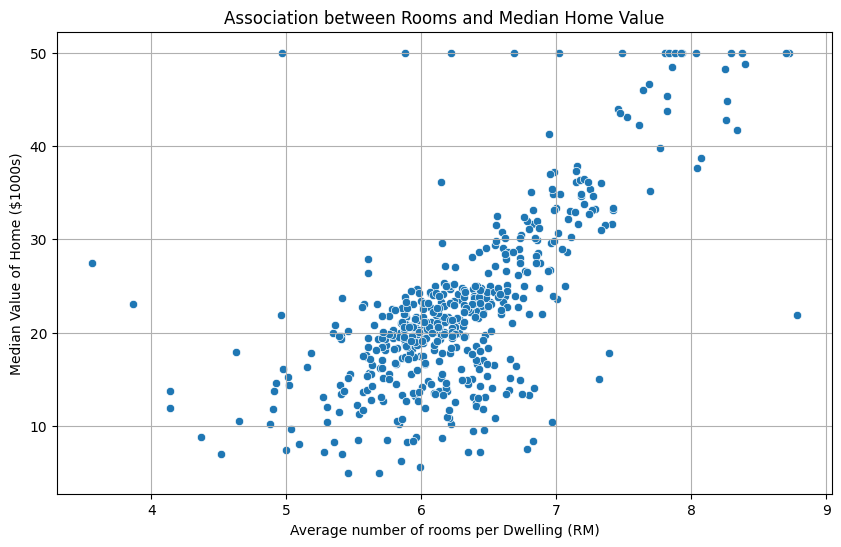

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='RM',y='MEDV',data=boston_df)
plt.title('Association between Rooms and Median Home Value')
plt.xlabel('Average number of rooms per Dwelling (RM)')
plt.ylabel('Median Value of Home ($1000s)')
plt.grid(True)
print("\nDisplacing scatter plot...")
plt.show()


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

print("----- Data Splitting -----")
print("Training set size:",len(x_train))
print("Testing set size:",len(x_test))

----- Data Splitting -----
Training set size: 339
Testing set size: 167


In [ ]:
#Above is the data preprocessing steps
#Build and Train the Linear Regression Moddel
model = LinearRegression()
model.fit(x_train,y_train)
print("\n------- Model Training --------")
print("Linear Regression model has been succesfully trained.")


------- Model Training --------
Linear Regression model has been succesfully trained.


In [ ]:
# m is sthe coefficient (slope)
# c is the intercept
intercept = model.intercept_
coefficient = model.coef_[0]

print("\n------- Model Parameters --------")
print(f"Intercept (c): {intercept:.4f}")
print(f"Coefficient for RM (m): {coefficient:.4f}")
print(f"The model equation is: MEDV = {coefficient:.4f} * RM + ({intercept:.4f})")


------- Model Parameters --------
Intercept (c): -34.2224
Coefficient for RM (m): 9.0391
The model equation is: MEDV = 9.0391 * RM + (-34.2224)


In [ ]:
#we make predictions on both
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [ ]:
#Calculate Mean Squared Error
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

print("\n ---- Model Evalation ----")
print(f"(MSE) Training Set: {mse_train:.4f}")
print(f"(MSE) Testing Set: {mse_test:.4f}")
print("-" * 27)


 ---- Model Evalation ----
(MSE) Training Set: 45.8290
(MSE) Testing Set: 39.0911
---------------------------


In [ ]:
#R - squared error
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print("\n ---- Model Evalation ----")
print(f"Training Set: {r2_train:.4f}")
print(f"Testing Set: {r2_test:.4f}")
print("-" * 27)


 ---- Model Evalation ----
Training Set: 0.4801
Testing Set: 0.4835
---------------------------



Displacing regression line plot...


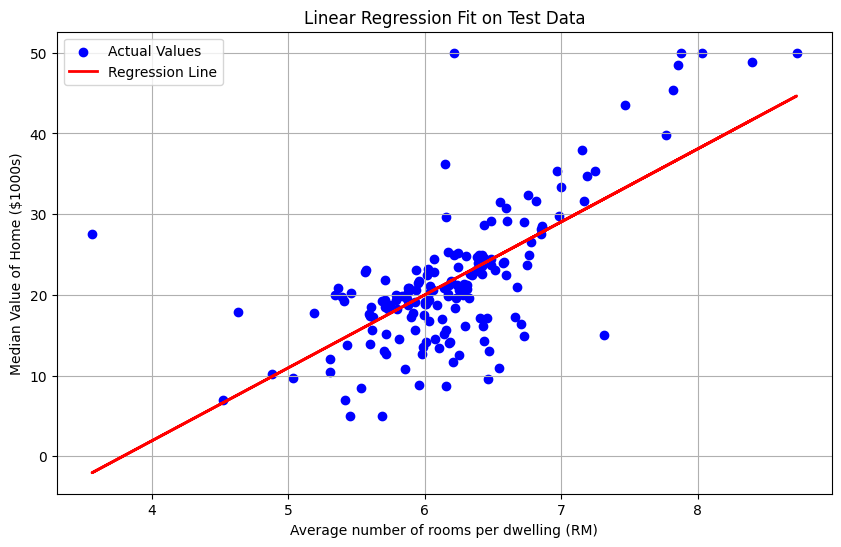

In [ ]:
#Plot the final graph
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test,color='blue',label='Actual Values')
plt.plot(x_test,y_test_pred,color='red',linewidth=2,label='Regression Line')
plt.title('Linear Regression Fit on Test Data')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median Value of Home ($1000s)')
plt.legend()
plt.grid(True)
print("\nDisplacing regression line plot...")
plt.show()